# Logistic Regression with a Neural Network minset

Add root path

In [1]:
import os, sys; sys.path.append(os.path.abspath('.\..\..'))
%load_ext autoreload
%autoreload 2

Import modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

from utils.activation_functions import sigmoid
from utils.load_datasets import load_cats_dataset
from utils.initialization import initialize_with_zeros_1_layer

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_cats_dataset()

y = [1], it's a 'cat' picture.


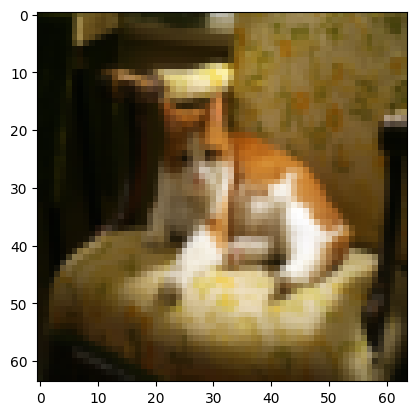

In [4]:
# Example of a picture
index = 7
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Shape in 2D: (n_rows, n_columns)

We have 209 cats images in the x training dataset, with 64 x 64 pixels, and 3 colors for each pixel, and the y label for each picture 

In [7]:
train_set_x_orig.shape,train_set_y.shape

((209, 64, 64, 3), (1, 209))

### Reshape arrays 

In [8]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

Now we have the 64x64 pixels concatenated, and each colors concatenated. For example, all red pixels concatenated, then all green pixels concatenated, and at the end all the yellow pixels. 
In each column there is a image, and one pixel for each row.

In [9]:
train_set_x_flatten.shape

(12288, 209)

### Normalize data

In [10]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

## General Architecture of the learning algorithm ##

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

### Initialize weights with zeros

In [ ]:
dim = 2
w, b = initialize_with_zeros_1_layer(dim)